In [2]:
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from tifffile import imread
import pandas as pd
import numpy as np

In [3]:
# Define file paths
csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\condensates_AIO-ER_stained.csv"
tif_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\condensates_stained.tif"
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\ilastik_representative.png"

In [4]:
# Constants for plotting
um_per_pixel = 0.117
scalebar_length_um = 1  # in micrometers
scalebar_color = 'white'
vmin, vmax = 20, 105

In [5]:
# Load CSV data
df = pd.read_csv(csv_path)

In [6]:
# Filter for frame 0 only
df_frame_0 = df[df['frame'] == 0]

In [7]:
# Extract contour coordinates
contour_coords = df_frame_0['contour_coord'].apply(ast.literal_eval)

In [8]:
# Load TIFF file
tif_data = imread(tif_path)

In [9]:
# Use the 0th frame (first in Python index logic)
img_frame_0 = tif_data[0]

In [10]:
# Define colormap for "MT", used for ER membrane contour
cmap_er = clr.LinearSegmentedColormap.from_list("transparent2red", [(0.753, 0.22, 0.188, 0), (0.753, 0.22, 0.188, 1)])

# Define colormap for "HOPS", used for the condensates
cmap_hops = clr.LinearSegmentedColormap.from_list("dark2blue", ["black", "#4C72B0"])


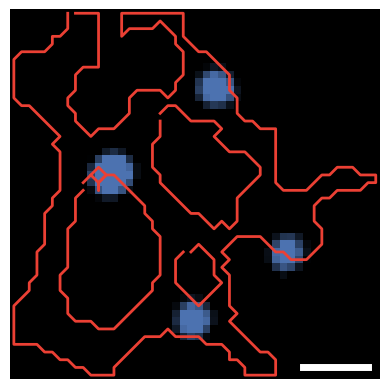

In [11]:
# Plot the image and overlay the contours
fig, ax = plt.subplots()

# Display the 0th frame image
ax.imshow(img_frame_0, cmap=cmap_hops, vmin=vmin, vmax=vmax)

# Overlay ER membrane contours
for coords in contour_coords:
    x, y = zip(*coords)
    ax.plot(x, y, color='#eb4034', lw=2)  # MT color for ER boundary
# Add a scalebar
scalebar_length_pxl = scalebar_length_um / um_per_pixel

# Coordinates for the scalebar start point
base_x, base_y = 37.5, 46
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-",
    color=scalebar_color,
    lw=5,
)

plt.axis('off')
plt.show()

# Save the figure
# plt.savefig(save_path, dpi=600, bbox_inches='tight', format='png')
# plt.close(fig)

## ER boundary and HOPS overlay with entire trajectory

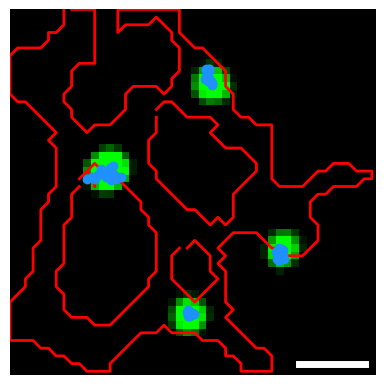

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from tifffile import imread
import pandas as pd

# Define file paths
tif_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\condensates_stained.tif"
csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\condensates_AIO-ER_stained.csv"
trajectory_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\12122024_for_montage\condensates_spots_reformatted.csv"
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\ilastik_representative\ilastik_representative_with_trajectory.png"

# Constants for plotting
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_color = 'white'
vmin, vmax = 20, 105

# Load data
df = pd.read_csv(csv_path)
trajectory_df = pd.read_csv(trajectory_csv_path)

# Filter for frame 0 only and extract contour coordinates
df_frame_0 = df[df['frame'] == 0]
contour_coords = df_frame_0['contour_coord'].apply(ast.literal_eval)

# Load TIFF file
tif_data = imread(tif_path)
img_frame_0 = tif_data[0] if len(tif_data.shape) == 3 else tif_data

# Define colormap for the hops image
cmap_hops = clr.LinearSegmentedColormap.from_list("dark2blue", ["black", "#00FF00"])

# Plot the image and overlay contours and tracks
fig, ax = plt.subplots()

# Display the TIFF image
ax.imshow(img_frame_0, cmap=cmap_hops, vmin=vmin, vmax=vmax)

# Overlay ER membrane contours
for coords in contour_coords:
    if coords:
        x, y = zip(*coords)
        ax.plot(x, y, color='red', lw=2)

# Overlay trajectories only up to t = 25
unique_track_ids = trajectory_df["trackID"].unique()
for track_id in unique_track_ids:
    hops_df = trajectory_df[(trajectory_df["trackID"] == track_id) & (trajectory_df["t"] <= 25)]
    x_plot = hops_df["x"].to_numpy(float)
    y_plot = hops_df["y"].to_numpy(float)
    ax.plot(x_plot, y_plot, "-o", color='dodgerblue', lw=0.1)

# Add a scalebar
scalebar_length_pxl = scalebar_length_um / um_per_pixel
base_x, base_y = 37.5, 46
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0, img_frame_0.shape[1]])
ax.set_ylim([img_frame_0.shape[0], 0])

plt.axis('off')
plt.show()

# Save the figure
fig.savefig(save_path, dpi=600, bbox_inches='tight', format='png', transparent=True)